## Observations and Insights 

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pharm_data = mouse_metadata.merge(study_results, on = 'Mouse ID')

# Display the data table for preview
pharm_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouseGroup = pharm_data.groupby('Mouse ID')
mouseCount = len(mouseGroup)
mouseCount

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouseTimepointData = pharm_data[['Mouse ID', 'Timepoint']]

#add column to tell which rows are duplicated
mouseTimepointData['duplicated'] = mouseTimepointData.duplicated()

#Make dataframe of duplicated rows, take mouse ID Series, find unique Mouse IDs in the series
mouseTimepointData[mouseTimepointData['duplicated'] == True]['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatedMouseData = pharm_data[pharm_data['Mouse ID'] == 'g989']
duplicatedMouseData.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pharm_data_cln = pharm_data[pharm_data['Mouse ID'] != 'g989']
pharm_data_cln.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mouseGroupCln = pharm_data_cln.groupby('Mouse ID')
mouseCountCln = len(mouseGroupCln)
mouseCountCln

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
regimenGroupCln = pharm_data_cln.groupby('Drug Regimen') 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimenMean = regimenGroupCln['Tumor Volume (mm3)'].mean()
regimenMedian = regimenGroupCln['Tumor Volume (mm3)'].median()
regimenVar = regimenGroupCln['Tumor Volume (mm3)'].var()
regimenStDev = regimenGroupCln['Tumor Volume (mm3)'].std()
regimenStErr = regimenGroupCln['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.
regimenDataWithColumns = pd.DataFrame({
                            'Mean': regimenMean,
                            'Median': regimenMedian,
                            'Variance': regimenVar,
                            'St Dev': regimenStDev,
                            'St Err': regimenStErr
})
regimenDataWithColumns

,Mean,Median,Variance,St Dev,St Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimenDataWithAgg = regimenGroupCln.agg({
                            'Tumor Volume (mm3)': ['mean', 'median','var','std','sem']
})
regimenDataWithAgg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

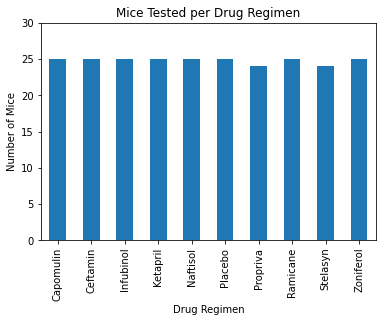

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mouseCountPerDrug = regimenGroupCln['Mouse ID'].nunique()
mouseCountPerDrug.plot(ylim = (0,30),title = 'Mice Tested per Drug Regimen', kind = 'bar')
plt.ylabel('Number of Mice')


Text(0.5, 1.0, 'Mice Tested per Drug Regimen')

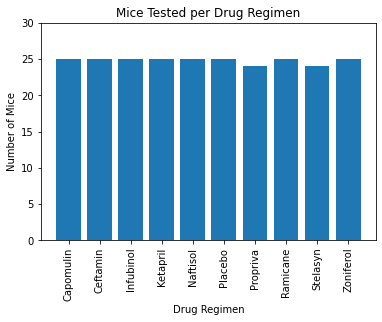

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(mouseCountPerDrug.index, mouseCountPerDrug.values)
plt.ylim(0,30)
plt.xticks(rotation = 90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Mice Tested per Drug Regimen')


<AxesSubplot:title={'center':'Sex of Mice in Study'}, ylabel='Sex'>

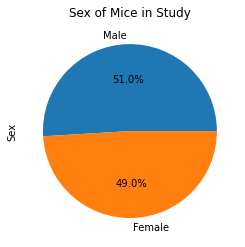

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouseSexCount = pharm_data_cln['Sex'].value_counts()
mouseSexCount.plot(title = 'Sex of Mice in Study', kind = 'pie', autopct='%.1f%%')

Text(0.5, 1.0, 'Sex of Mice in Study')

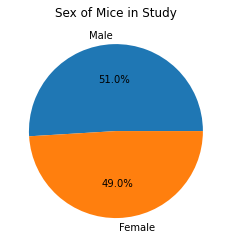

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
sizes = [mouseSexCount['Male'], mouseSexCount['Female']]
plt.pie(sizes, labels = labels, autopct='%.1f%%')
plt.title('Sex of Mice in Study')


## Quartiles, Outliers and Boxplots

In [73]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
pharm_data_cln_CRIC = pharm_data_cln[(pharm_data_cln['Drug Regimen'] == 'Capomulin') | (pharm_data_cln['Drug Regimen'] == 'Ramicane') | (pharm_data_cln['Drug Regimen'] == 'Infubinol') | (pharm_data_cln['Drug Regimen'] == 'Ceftamin')]

# Start by getting the last (greatest) timepoint for each mouse
lastTimePointByMID = pharm_data_cln_CRIC.groupby('Mouse ID').max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
lastTimeCIRC = lastTimePointByMID.merge(pharm_data_cln, how = 'left', on = ['Timepoint', 'Mouse ID'])#[['Mouse ID', 'Timepoint']]
lastTimeCIRC

,Drug Regimen_x,Mouse ID,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,Infubinol,a203,Female,20,23,45,67.973419,2,Infubinol,Female,20,23,67.973419,2
1,Infubinol,a251,Female,21,25,45,65.525743,1,Infubinol,Female,21,25,65.525743,1
2,Ceftamin,a275,Female,20,28,45,62.999356,3,Ceftamin,Female,20,28,62.999356,3
3,Ramicane,a411,Male,3,22,45,45.466677,1,Ramicane,Male,3,22,38.407618,1
4,Ramicane,a444,Female,10,25,45,45.000000,0,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Ceftamin,y769,Female,6,27,45,68.594745,4,Ceftamin,Female,6,27,68.594745,4
96,Capomulin,y793,Male,17,17,45,45.000000,2,Capomulin,Male,17,17,31.896238,2
97,Ceftamin,y865,Male,23,26,45,64.729837,3,Ceftamin,Male,23,26,64.729837,3
98,Ramicane,z578,Male,11,16,45,45.000000,0,Ramicane,Male,11,16,30.638696,0


In [149]:
# Put treatments into a list for for loop (and later for plot labels)
treatmentsCIRC = lastTimeCIRC['Drug Regimen_y'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumorVolCIRC = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
lastTimeCap = lastTimeCIRC[tumorVolAtLastTimeCIRC['Drug Regimen_y'] == 'Capomulin']
lastTimeRam = lastTimeCIRC[tumorVolAtLastTimeCIRC['Drug Regimen_y'] == 'Ramicane']
lastTimeInf = lastTimeCIRC[tumorVolAtLastTimeCIRC['Drug Regimen_y'] == 'Infubinol']
lastTimeCef = lastTimeCIRC[tumorVolAtLastTimeCIRC['Drug Regimen_y'] == 'Ceftamin'] 
    
    # add subset 
tumorVolsCap = lastTimeCap['Tumor Volume (mm3)_y'] 
tumorVolsRam = lastTimeRam['Tumor Volume (mm3)_y'] 
tumorVolsInf = lastTimeInf['Tumor Volume (mm3)_y'] 
tumorVolsCef = lastTimeCef['Tumor Volume (mm3)_y']

    # Determine outliers using upper and lower bounds
tumorVolsCapIQR = tumorVolsCap.quantile(0.75) - tumorVolsCap.quantile(0.25)
tumorVolsCapOutUpLim = tumorVolsCap.median() + 1.5*tumorVolsCapIQR 
tumorVolsCapOutLowLim = tumorVolsCap.median() - 1.5*tumorVolsCapIQR

tumorVolsRamIQR = tumorVolsRam.quantile(0.75) - tumorVolsRam.quantile(0.25)
tumorVolsRamOutUpLim = tumorVolsRam.median() + 1.5*tumorVolsRamIQR 
tumorVolsRamOutLowLim = tumorVolsRam.median() - 1.5*tumorVolsRamIQR

tumorVolsInfIQR = tumorVolsInf.quantile(0.75) - tumorVolsInf.quantile(0.25)
tumorVolsInfOutUpLim = tumorVolsInf.median() + 1.5*tumorVolsInfIQR 
tumorVolsInfOutLowLim = tumorVolsInf.median() - 1.5*tumorVolsInfIQR

tumorVolsCefIQR = tumorVolsCef.quantile(0.75) - tumorVolsCef.quantile(0.25)
tumorVolsCefOutUpLim = tumorVolsCef.median() + 1.5*tumorVolsCefIQR 
tumorVolsCefOutLowLim = tumorVolsCef.median() - 1.5*tumorVolsCefIQR

volOutsCap = lastTimeCap[(lastTimeCap['Tumor Volume (mm3)_y'] > tumorVolsCapOutUpLim) | (lastTimeCap['Tumor Volume (mm3)_y'] < tumorVolsCapOutLowLim)]
volOutsRam = lastTimeRam[(lastTimeRam['Tumor Volume (mm3)_y'] > tumorVolsRamOutUpLim) | (lastTimeRam['Tumor Volume (mm3)_y'] < tumorVolsRamOutLowLim)]
volOutsInf = lastTimeInf[(lastTimeInf['Tumor Volume (mm3)_y'] > tumorVolsInfOutUpLim) | (lastTimeInf['Tumor Volume (mm3)_y'] < tumorVolsInfOutLowLim)]
volOutsCef = lastTimeCef[(lastTimeCef['Tumor Volume (mm3)_y'] > tumorVolsCefOutUpLim) | (lastTimeCef['Tumor Volume (mm3)_y'] < tumorVolsCefOutLowLim)]

volOutsCIRC = volOutsCap.append(volOutsRam).append(volOutsInf).append(volOutsCef)
volOutsCIRC

,Drug Regimen_x,Mouse ID,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Tumor Volume (mm3)_y,Metastatic Sites_y
70,Capomulin,s185,Female,3,17,45,45.0,1,Capomulin,Female,3,17,23.343598,1
40,Ramicane,k403,Male,21,16,45,45.0,1,Ramicane,Male,21,16,22.050126,1
15,Infubinol,c326,Female,18,25,5,45.0,0,Infubinol,Female,18,25,36.321346,0


Text(0, 0.5, 'Tumor Volume')

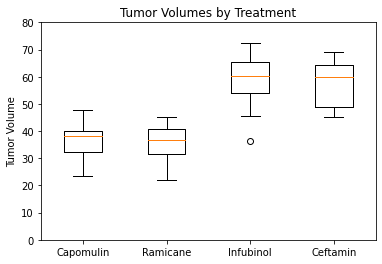

In [160]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#DF = pd.DataFrame({'Cap': tumorVolsCap, 'Ram': tumorVolsRam, 'Inf': tumorVolsInf, 'Cef': tumorVolsCef})
#DF.plot(kind = 'box')
plt.boxplot([tumorVolsCap, tumorVolsRam, tumorVolsInf, tumorVolsCef], labels = ['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.ylim(0,80)
plt.title('Tumor Volumes by Treatment')
plt.ylabel('Tumor Volume')


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
